In [1]:
#import libraries
import os                  
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
#import data from crawling to dataframe
df = pd.read_csv('bgg_csv.csv', encoding='latin-1')

In [3]:
#show raw dataframe (head)
df.head(5)

,Unnamed: 0,Name,Rank,Rating,#_of_Ratings,#_of_Comments,Year,Min_Players,Max_Players,Best_Players,Min_Time,Max_Time,Min_Age,Complexity,Copies Owned,Type,Designer,Artist,Publisher
0,0,Gloomhaven,1.0,8.72716,49896,8856,2017.0,1.0,4.0,3.0,60.0,120.0,14.0,3.8741,80765,Strategy,Isaac Childres,Alexandr Elichev,Cephalofair Games
1,1,Pandemic Legacy: Season 1,2.0,8.58731,46308,6975,2015.0,2.0,4.0,4.0,60.0,60.0,13.0,2.8295,72614,Strategy,Rob Daviau,Chris Quilliams,Z-Man Games
2,2,Brass: Birmingham,3.0,8.65906,27808,4106,2018.0,2.0,4.0,3.0,60.0,120.0,14.0,3.9040,41401,Strategy,Gavan Brown,Lina Cossette,Roxley
3,3,Terraforming Mars,4.0,8.41216,77803,11259,2016.0,1.0,5.0,3.0,120.0,120.0,12.0,3.2482,107064,Strategy,Jacob Fryxelius,Isaac Fryxelius,FryxGames
4,4,Gloomhaven: Jaws of the Lion,5.0,8.64182,19054,2843,2020.0,1.0,4.0,2.0,30.0,120.0,14.0,3.5911,45433,Strategy,Isaac Childres,Francesca Baerald,Cephalofair Games


In [4]:
#show raw data frame (tail)
df.tail(5)

,Unnamed: 0,Name,Rank,Rating,#_of_Ratings,#_of_Comments,Year,Min_Players,Max_Players,Best_Players,Min_Time,Max_Time,Min_Age,Complexity,Copies Owned,Type,Designer,Artist,Publisher
54995,54995,NanoVenture,NaN,1.00000,1,1,2008.0,2.0,5.0,3.0,60.0,60.0,NaN,NaN,1,NaN,NaN,Ryan Nygard,Materials Research Science and Engineering Center
54996,54996,Tell Me No Lies,NaN,NaN,0,0,2009.0,3.0,8.0,NaN,30.0,30.0,15.0,NaN,4,NaN,David Henderson,NaN,(Web published)
54997,54997,Penguin C,NaN,4.82353,17,6,2009.0,2.0,4.0,4.0,20.0,20.0,NaN,2.0,10,Children's,Kano Kim,Kano Kim,NamuHana
54998,54998,Dragons: An Adventure Into Middle Earth,NaN,NaN,0,3,1977.0,2.0,4.0,NaN,NaN,NaN,NaN,5.0,7,NaN,Lee Harvey,NaN,(Self-Published)
54999,54999,Starmada: The Admiralty Edition â Rules Annex,NaN,7.38462,13,5,2009.0,2.0,12.0,2.0,180.0,180.0,12.0,2.5,55,NaN,Jim Callahan,James M. Dugan,Amarillo Design Bureau


In [5]:
#data frame size
df.shape

(55000, 19)

In [6]:
df2=df.copy()

#drop irrelevant columns - '# of ratings' and 'rank' are similar to the column we want to predict (rating) and we need to avoid overfitting
#name column is irrelevant to the prediction, and unnamed is a junk column we got from crawling
df2=df2.drop('Name',1) 
df2=df2.drop('Rank',1) 
df2=df2.drop('Unnamed: 0', 1)
df2=df2.drop('#_of_Ratings', 1)

In [7]:
#drop rows with empty values by using dropna method
df2.dropna(inplace=True)

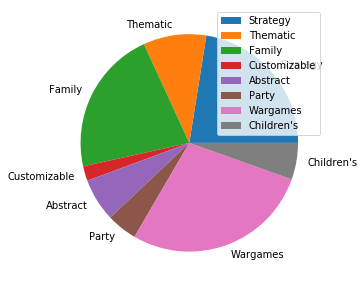

In [8]:
#pie chart for complexity
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
count8 = 0

for val in df2['Type']:
    if(val == 'Strategy'):
        count1 += 1
    else:
        if(val == 'Thematic'):
            count2 += 1
        else:
            if(val == 'Family'):
                count3 += 1
            else:
                if(val == 'Customizable'):
                    count4 += 1
                else:
                    if(val == 'Abstract'):
                        count5 += 1
                    else:
                        if(val == 'Party'):
                            count6 += 1
                        else:
                            if(val == 'Wargames'):
                                count7 += 1
                            else:
                                if(val == "Children's"):
                                    count8 += 1

my_data = pd.DataFrame({'': [count1, count2, count3, count4, count5, count6, count7, count8]},
                  index=['Strategy', 'Thematic', 'Family', 'Customizable', 'Abstract', 'Party',
 'Wargames', "Children's"])
my_data.plot.pie(y='', figsize=(5, 5))

In [9]:
#show dataframe after manipulation (head)
df2.head(5)

,Rating,#_of_Comments,Year,Min_Players,Max_Players,Best_Players,Min_Time,Max_Time,Min_Age,Complexity,Copies Owned,Type,Designer,Artist,Publisher
0,8.72716,8856,2017.0,1.0,4.0,3.0,60.0,120.0,14.0,3.8741,80765,Strategy,Isaac Childres,Alexandr Elichev,Cephalofair Games
1,8.58731,6975,2015.0,2.0,4.0,4.0,60.0,60.0,13.0,2.8295,72614,Strategy,Rob Daviau,Chris Quilliams,Z-Man Games
2,8.65906,4106,2018.0,2.0,4.0,3.0,60.0,120.0,14.0,3.9040,41401,Strategy,Gavan Brown,Lina Cossette,Roxley
3,8.41216,11259,2016.0,1.0,5.0,3.0,120.0,120.0,12.0,3.2482,107064,Strategy,Jacob Fryxelius,Isaac Fryxelius,FryxGames
4,8.64182,2843,2020.0,1.0,4.0,2.0,30.0,120.0,14.0,3.5911,45433,Strategy,Isaac Childres,Francesca Baerald,Cephalofair Games


In [10]:
#show dataframe after manipulation (tail)
df2.tail(5)

,Rating,#_of_Comments,Year,Min_Players,Max_Players,Best_Players,Min_Time,Max_Time,Min_Age,Complexity,Copies Owned,Type,Designer,Artist,Publisher
54863,6.55638,484,2009.0,2.0,5.0,4.0,40.0,80.0,8.0,1.9692,6843,Strategy,Philippe Keyaerts,Miguel Coimbra,Days of Wonder
54886,6.74014,33,2009.0,2.0,4.0,4.0,45.0,45.0,10.0,1.6667,325,Family,Leo Colovini,Michael Menzel,AMIGO
54894,8.68672,344,2010.0,2.0,4.0,2.0,180.0,180.0,12.0,3.9915,1155,Thematic,Roberto Di Meglio,Paolo Ciurli,Nexus Editrice
54911,4.33333,0,1995.0,2.0,6.0,3.0,20.0,20.0,4.0,1.0000,8,Children's,Heinz Meister,Antje Flad,HABA
54922,6.00000,8,2009.0,2.0,4.0,4.0,60.0,60.0,10.0,3.0000,16,Wargames,Donghoon Lee,Seungpyo Hong,Visionary


In [11]:
#show dataframe size after manipulation 
df2.shape

(7678, 15)

In [12]:
#convert string values to numeric values of designer, type, artist and publisher columns
encoder = preprocessing.LabelEncoder() 
df2['Designer'] = encoder.fit_transform(df2['Designer'].astype(str))
df2['Type'] = encoder.fit_transform(df2['Type'].astype(str))
df2['Artist'] = encoder.fit_transform(df2['Artist'].astype(str))
df2['Publisher'] = encoder.fit_transform(df2['Publisher'].astype(str))

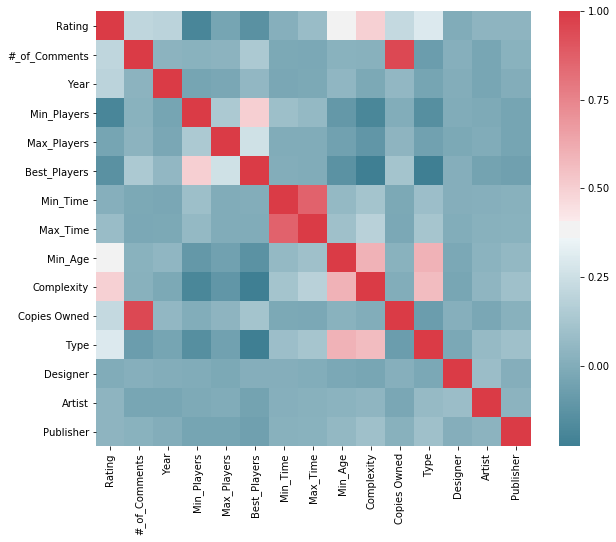

In [13]:
#correlation matrix and heatmap visualization
corr = df2.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [14]:
#correlation table
corr_table = df2.corr()
corr_table

,Rating,#_of_Comments,Year,Min_Players,Max_Players,Best_Players,Min_Time,Max_Time,Min_Age,Complexity,Copies Owned,Type,Designer,Artist,Publisher
Rating,1.000000,0.209314,0.192303,-0.192633,-0.037033,-0.131172,0.017361,0.078877,0.377761,0.497107,0.219571,0.304928,-0.005503,0.039532,0.040073
#_of_Comments,0.209314,1.000000,0.033452,0.025845,0.034068,0.139139,-0.018017,-0.022651,0.025939,0.019593,0.952021,-0.073682,0.017291,-0.034119,0.026876
Year,0.192303,0.033452,1.000000,-0.039600,-0.029621,0.054604,-0.027122,-0.020453,0.047454,-0.016802,0.054173,-0.038806,0.006635,-0.032939,0.007872
Min_Players,-0.192633,0.025845,-0.039600,1.000000,0.138585,0.505705,0.093473,0.061938,-0.100044,-0.184355,0.002861,-0.145217,-0.002660,-0.012792,-0.039445
Max_Players,-0.037033,0.034068,-0.029621,0.138585,1.000000,0.259685,-0.001611,-0.004396,-0.058823,-0.107983,0.039695,-0.058598,-0.017943,-0.005793,-0.037856
Best_Players,-0.131172,0.139139,0.054604,0.505705,0.259685,1.000000,0.004737,-0.005109,-0.130210,-0.226659,0.114997,-0.223617,0.009547,-0.046502,-0.063006
Min_Time,0.017361,-0.018017,-0.027122,0.093473,-0.001611,0.004737,1.000000,0.863197,0.064292,0.117502,-0.018975,0.084827,0.010937,0.017674,0.018142
Max_Time,0.078877,-0.022651,-0.020453,0.061938,-0.004396,-0.005109,0.863197,1.000000,0.099034,0.182475,-0.022955,0.118953,-0.000245,0.018594,0.024679
Min_Age,0.377761,0.025939,0.047454,-0.100044,-0.058823,-0.130210,0.064292,0.099034,1.000000,0.600877,0.024964,0.598417,-0.021718,0.028621,0.056059
Complexity,0.497107,0.019593,-0.016802,-0.184355,-0.107983,-0.226659,0.117502,0.182475,0.600877,1.000000,-0.000997,0.564470,-0.032077,0.046130,0.098170


In [15]:
#dropping '# of comments' column due to high correlation with 'owned copies' column to avoid overfitting
df2=df2.drop('#_of_Comments',1)

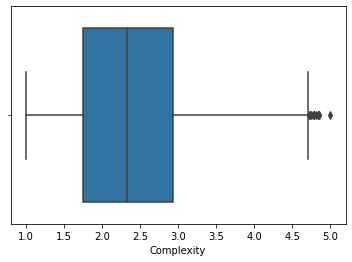

In [16]:
#'Complexity' outliers visualization via boxplot
sns.boxplot(df2.Complexity)

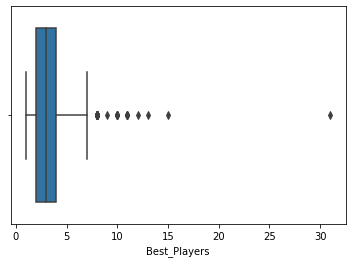

In [17]:
#'Best players' outliers visualization via boxplot
sns.boxplot(df2.Best_Players)

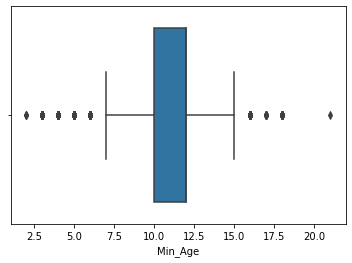

In [18]:
#'Min age' outliers visualization via boxplot
sns.boxplot(df2.Min_Age)

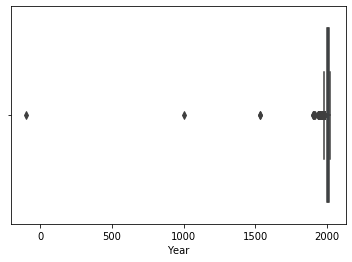

In [19]:
#'Year' outliers visualization via boxplot
sns.boxplot(df2.Year)

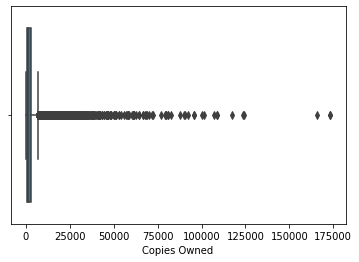

In [20]:
#'Copies owned' outliers visualization via boxplot
sns.boxplot(df2['Copies Owned'])

In [21]:
#deleting outliers we found before in 'year' column
list_year_new = []
list_year = df2['Year'].tolist()

for val in list_year:
    if(val >= 2000):
        list_year_new.append(val)
    else:
        list_year_new.append(np.nan)
        
df2['Year'] = list_year_new
df2.dropna(inplace=True)

In [22]:
#deleting outliers we found before in 'min age' column
list_min_age = []
list_age = df2['Min_Age'].tolist()

for val in list_age:
    if(val <= 18 and val >= 3):
        list_min_age.append(val)
    else:
        list_min_age.append(np.nan)
        
df2['Min_Age'] = list_min_age 
df2.dropna(inplace=True)

In [23]:
#deleting outliers we found before in 'copies owned' column
list_copies = []
list_c = df2['Copies Owned'].tolist()

for val in list_c:
    if(val <= 100000):
        list_copies.append(val)
    else:
        list_copies.append(np.nan)
        
df2['Copies Owned'] = list_copies
df2.dropna(inplace=True)

In [24]:
#deleting outliers we found before in 'best players' column
list_best = []
list_b = df2['Best_Players'].tolist()

for val in list_b:
    if(val <= 7):
        list_best.append(val)
    else:
        list_best.append(np.nan)
        
df2['Best_Players'] = list_best
df2.dropna(inplace=True)

In [25]:
#deleting outliers we found before in 'complexity' column
list_complexity = []
list_comp = df2['Complexity'].tolist()

for val in list_comp:
    if(val <= 4.4):
        list_complexity.append(val)
    else:
        list_complexity.append(np.nan)
        
df2['Complexity'] = list_complexity
df2.dropna(inplace=True)

In [26]:
#preparations for graph creation
age_comp_df = pd.DataFrame({'Min_Age':df2['Min_Age'], 'Complexity':df2['Complexity']})
age_copies_df = pd.DataFrame({'Min_Age':df2['Min_Age'], 'Copies Owned':df2['Copies Owned']})
age_year_df = pd.DataFrame({'Year':df2['Year'], 'Copies Owned':df2['Copies Owned']})

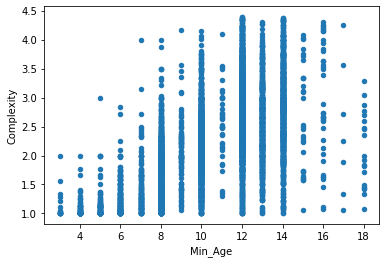

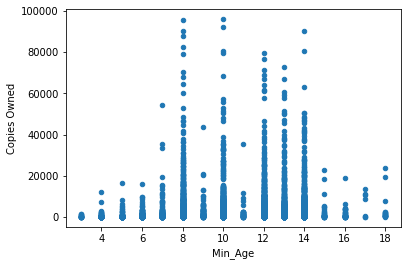

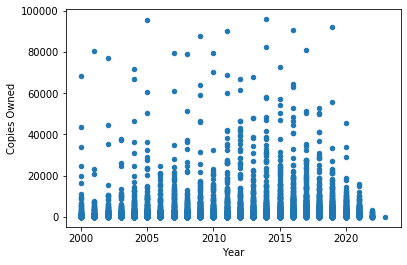

In [27]:
#scatter plot graph for 'complexity'
age_comp_df.plot(x ='Min_Age', y='Complexity', kind = 'scatter')

#scatter plot graph for 'complexity'
age_copies_df.plot(x ='Min_Age', y='Copies Owned', kind = 'scatter')

#scatter plot graph for 'copies owned'
age_year_df.plot(x ='Year', y='Copies Owned', kind = 'scatter')

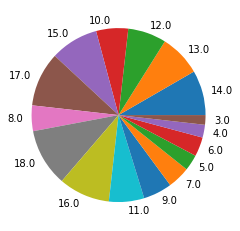

In [28]:
#pie chart for 'min age' column
age = df2['Min_Age'].unique()

data = age
plt.pie(data, labels = data)
plt.show()

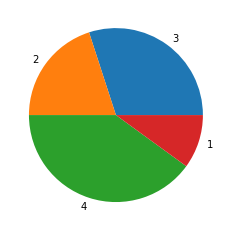

In [29]:
#pie chart for 'complexity' column ---> we also created a modified complexity column which called 'new_complexity'
new_complexity = []

for val in df2['Complexity']:
    if(val >= 1 and val < 2):
        new_complexity.append(1)
    else:
        if(val >= 2 and val < 3):
            new_complexity.append(2)
        else:
            if(val >= 3 and val < 4):
                new_complexity.append(3)
            else:
                new_complexity.append(4)

df2['new_complexity'] = new_complexity                
data = df2['new_complexity'].unique()
plt.pie(data, labels = data)
plt.show()

In [30]:
#dropping complexity to stay with the new complexity column we made
df2.drop('Complexity', 1)

,Rating,Year,Min_Players,Max_Players,Best_Players,Min_Time,Max_Time,Min_Age,Copies Owned,Type,Designer,Artist,Publisher,new_complexity
0,8.72716,2017.0,1.0,4.0,3.0,60.0,120.0,14.0,80765.0,5,1136,85,288,3
1,8.58731,2015.0,2.0,4.0,4.0,60.0,60.0,13.0,72614.0,5,2338,471,1419,2
2,8.65906,2018.0,2.0,4.0,3.0,60.0,120.0,14.0,41401.0,5,960,1669,1171,3
4,8.64182,2020.0,1.0,4.0,2.0,30.0,120.0,14.0,45433.0,5,1136,946,288,3
5,8.66318,2017.0,3.0,6.0,6.0,240.0,480.0,14.0,21623.0,5,556,2459,517,4
6,8.46187,2017.0,1.0,4.0,3.0,60.0,150.0,12.0,25627.0,5,1292,724,527,4
7,8.41978,2016.0,2.0,4.0,2.0,180.0,240.0,14.0,40741.0,6,509,1869,517,3
8,8.36516,2017.0,1.0,4.0,2.0,90.0,120.0,13.0,51203.0,5,2240,1280,676,4
9,8.51796,2011.0,2.0,4.0,2.0,150.0,180.0,13.0,26393.0,6,2374,1419,110,4
11,8.28829,2016.0,2.0,4.0,3.0,75.0,150.0,12.0,40821.0,5,87,135,1439,3


In [31]:
#making feature vectors and dropping the necessary column for the prediction
y = df2['Rating']
X = df2.drop('Rating', 1)

#split to train set and test set ---> 20% test set and 80% train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True) 

In [32]:
#random forest regressor model
model = RandomForestRegressor(n_estimators = 100, random_state = 0)

#training the regression model
model.fit(X_train, y_train)

#r2_score prediction
predictions = model.predict(X_test)
evaluate_value2 = r2_score(y_test,predictions)

#show prediction value
print(evaluate_value2)

0.5840301263802101


In [33]:
#cross validation to check the predictions in general with cv = 10
cross_val_10 = cross_val_score(model, X_train, y_train, cv=10)
#show cross validation score
print(f'cross validation array: {cross_val_10}')

#cross validation average
cv_mean_10 = cross_val_10.mean()

print(f'cross validation average 5 folds: {cv_mean_10}')

cross validation array: [0.60761714 0.63969073 0.60654371 0.6106093  0.60474781 0.53536084
 0.57185431 0.61504759 0.57138592 0.57453596]
cross validation average 5 folds: 0.5937393310027637


In [34]:
#we are checking the MSE --> mean squard error ---> we got a result of 0.2 
MSE = np.square(np.subtract(y_test,predictions)).mean()
MSE

0.22298801267944762